<a href="https://colab.research.google.com/github/SrijeshReddy11/my_ML_projects/blob/Machine_learning/Amazon_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [121]:
df = pd. read_csv('/content/Reviews.csv')
print(df.shape)

(568454, 10)


In [122]:
df=df.head(500)

In [123]:
df['Summary'].values[1]

'Not as Advertised'

In [124]:
print(df.shape)

(500, 10)


#***EDA***

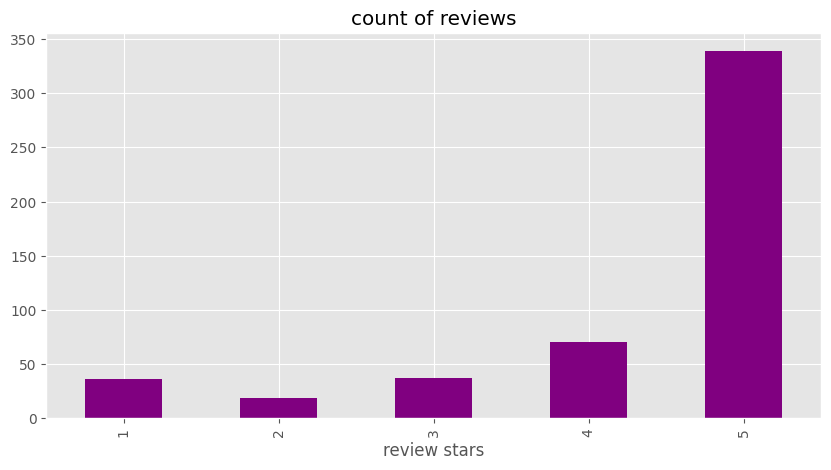

In [125]:
ax= df['Score'].value_counts().sort_index()\
.plot(kind='bar', title='count of reviews', figsize=(10,5), color='purple')
ax.set_xlabel('review stars')
plt.show()


## **Basic NLTK ***

In [126]:
#taking Text from 50th row
ex= df['Text'][50]
ex

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [127]:
#downloading punkt and tokenizing the sentence
nltk.download('punkt')

tokens=nltk.word_tokenize(ex)
tokens[:10]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [128]:
#downloading averaged_perceptron_tagger and initiating part of speech tagger
nltk.download('averaged_perceptron_tagger')
tagged=nltk.pos_tag(tokens)
tagged[:10]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [129]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint()


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...


(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


[nltk_data]   Package words is already up-to-date!


# VADER SENTIMENT SCORING

In [130]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia=SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [131]:
sia.polarity_scores('I looked bad')

{'neg': 0.778, 'neu': 0.222, 'pos': 0.0, 'compound': -0.5423}

In [132]:
#checking the polarity scores for ex
sia.polarity_scores(ex)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [133]:
#now we do this polarity scoring for the entire dataset
#and storing in dictionary
res={}
for i, row in tqdm(df.iterrows(), total=len(df)):
  text = row['Text']
  myid = row['Id']
  res[myid]=sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [109]:
#slicing the half million records into 500 using intertools
import itertools
df = dict(itertools.islice(res.items(), 500))
df

{1: {'neg': 0.0,
  'neu': 0.695,
  'pos': 0.305,
  'compound': 0.9441,
  'roberta_neg': 0.009624231,
  'roberta_neu': 0.049980387,
  'roberta_pos': 0.94039536},
 2: {'neg': 0.138,
  'neu': 0.862,
  'pos': 0.0,
  'compound': -0.5664,
  'roberta_neg': 0.5089861,
  'roberta_neu': 0.45241356,
  'roberta_pos': 0.038600374},
 3: {'neg': 0.091,
  'neu': 0.754,
  'pos': 0.155,
  'compound': 0.8265,
  'roberta_neg': 0.003228897,
  'roberta_neu': 0.09806742,
  'roberta_pos': 0.8987037},
 4: {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0,
  'roberta_neg': 0.002295128,
  'roberta_neu': 0.09021926,
  'roberta_pos': 0.9074856},
 5: {'neg': 0.0,
  'neu': 0.552,
  'pos': 0.448,
  'compound': 0.9468,
  'roberta_neg': 0.0016347276,
  'roberta_neu': 0.010302461,
  'roberta_pos': 0.98806286},
 6: {'neg': 0.029,
  'neu': 0.809,
  'pos': 0.163,
  'compound': 0.883,
  'roberta_neg': 0.006129598,
  'roberta_neu': 0.021795882,
  'roberta_pos': 0.97207445},
 7: {'neg': 0.034,
  'neu': 0.693,
  'pos'

In [134]:
vaders=pd.DataFrame(res).T
vaders=vaders.reset_index().rename(columns={'index':'Id'})
#merging
vaders=vaders.merge(df, how='left')

In [135]:
#merged sheet of sentiment score and the data
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Plotting VADER results

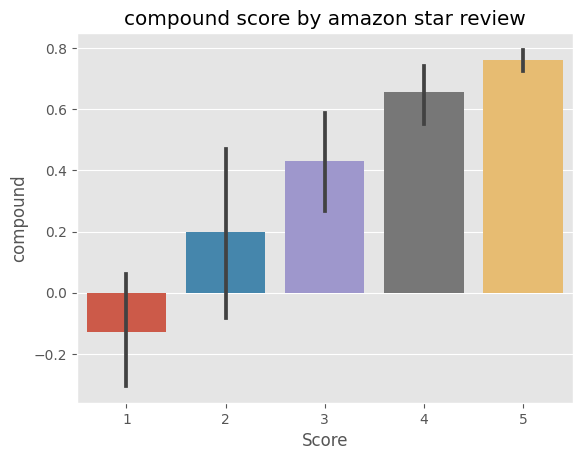

In [136]:
an=sns.barplot(data=vaders, x='Score', y='compound')
an.set_title('compound score by amazon star review')
plt.show()

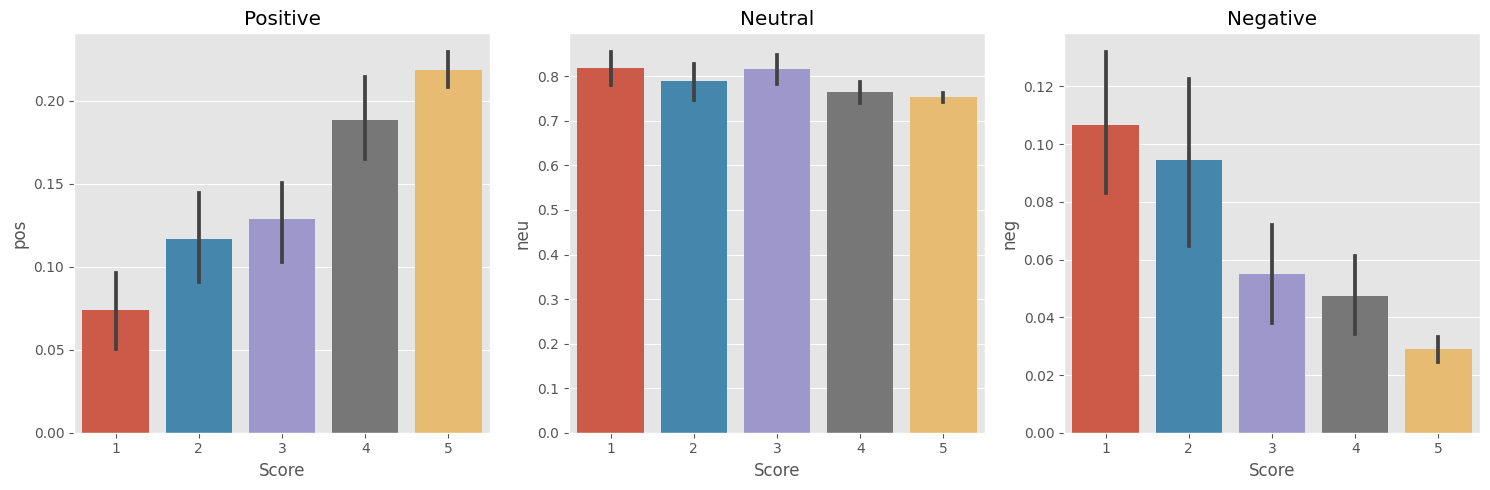

In [137]:
#subplots for pos, neu, negative using matplotlib
fig, axs=plt.subplots(1,3, figsize=(15,5))

sns.barplot(data=vaders, x='Score', y='pos',ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu',ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg',ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# Roberta Pretrained Model

In [138]:
!pip install transformers
!pip install scipy
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [139]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [140]:
#Roberta for ex
encoded_text=tokenizer(ex, return_tensors='pt')
output=model(**encoded_text)
scores=output[0][0].detach().numpy()
scores=softmax(scores)
scores_dict={
    'roberta_neg':scores[0],
    'roberta_neu':scores[1],
    'roberta_pos':scores[2]
    }
print(scores_dict)

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687465, 'roberta_pos': 0.0029573692}


In [141]:
#vader ex
print (ex)
sia.polarity_scores(ex)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [142]:
def polarity_scores_roberta(ex):
  encoded_text=tokenizer(ex, return_tensors='pt')
  output=model(**encoded_text)
  scores=output[0][0].detach().numpy()
  scores=softmax(scores)
  scores_dict={
    'roberta_neg':scores[0],
    'roberta_neu':scores[1],
    'roberta_pos':scores[2]
  }
  return scores_dict


In [143]:
res={}
for i, row in tqdm(df.iterrows(), total=len(df)):
  try:
      text = row['Text']
      myid = row['Id']
      vader_result=sia.polarity_scores(text)
      vader_result_rename={}
      for key, value in vader_result.items():
          vader_result_rename[f"vader_{key}"]=value
      roberta_result=polarity_scores_roberta(text)
      both={**vader_result,**roberta_result}
      res[myid]=both
  except RuntimeError:
      print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


In [145]:
results_df=pd.DataFrame(res).T
results_df=results_df.reset_index().rename(columns={'index':'Id'})
#merging
results_df=results_df.merge(df, how='left')

# Combine and Compare Scores Between Models

In [147]:
results_df.columns


Index(['Id', 'neg', 'neu', 'pos', 'compound', 'roberta_neg', 'roberta_neu',
       'roberta_pos', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'Summary', 'Text'],
      dtype='object')

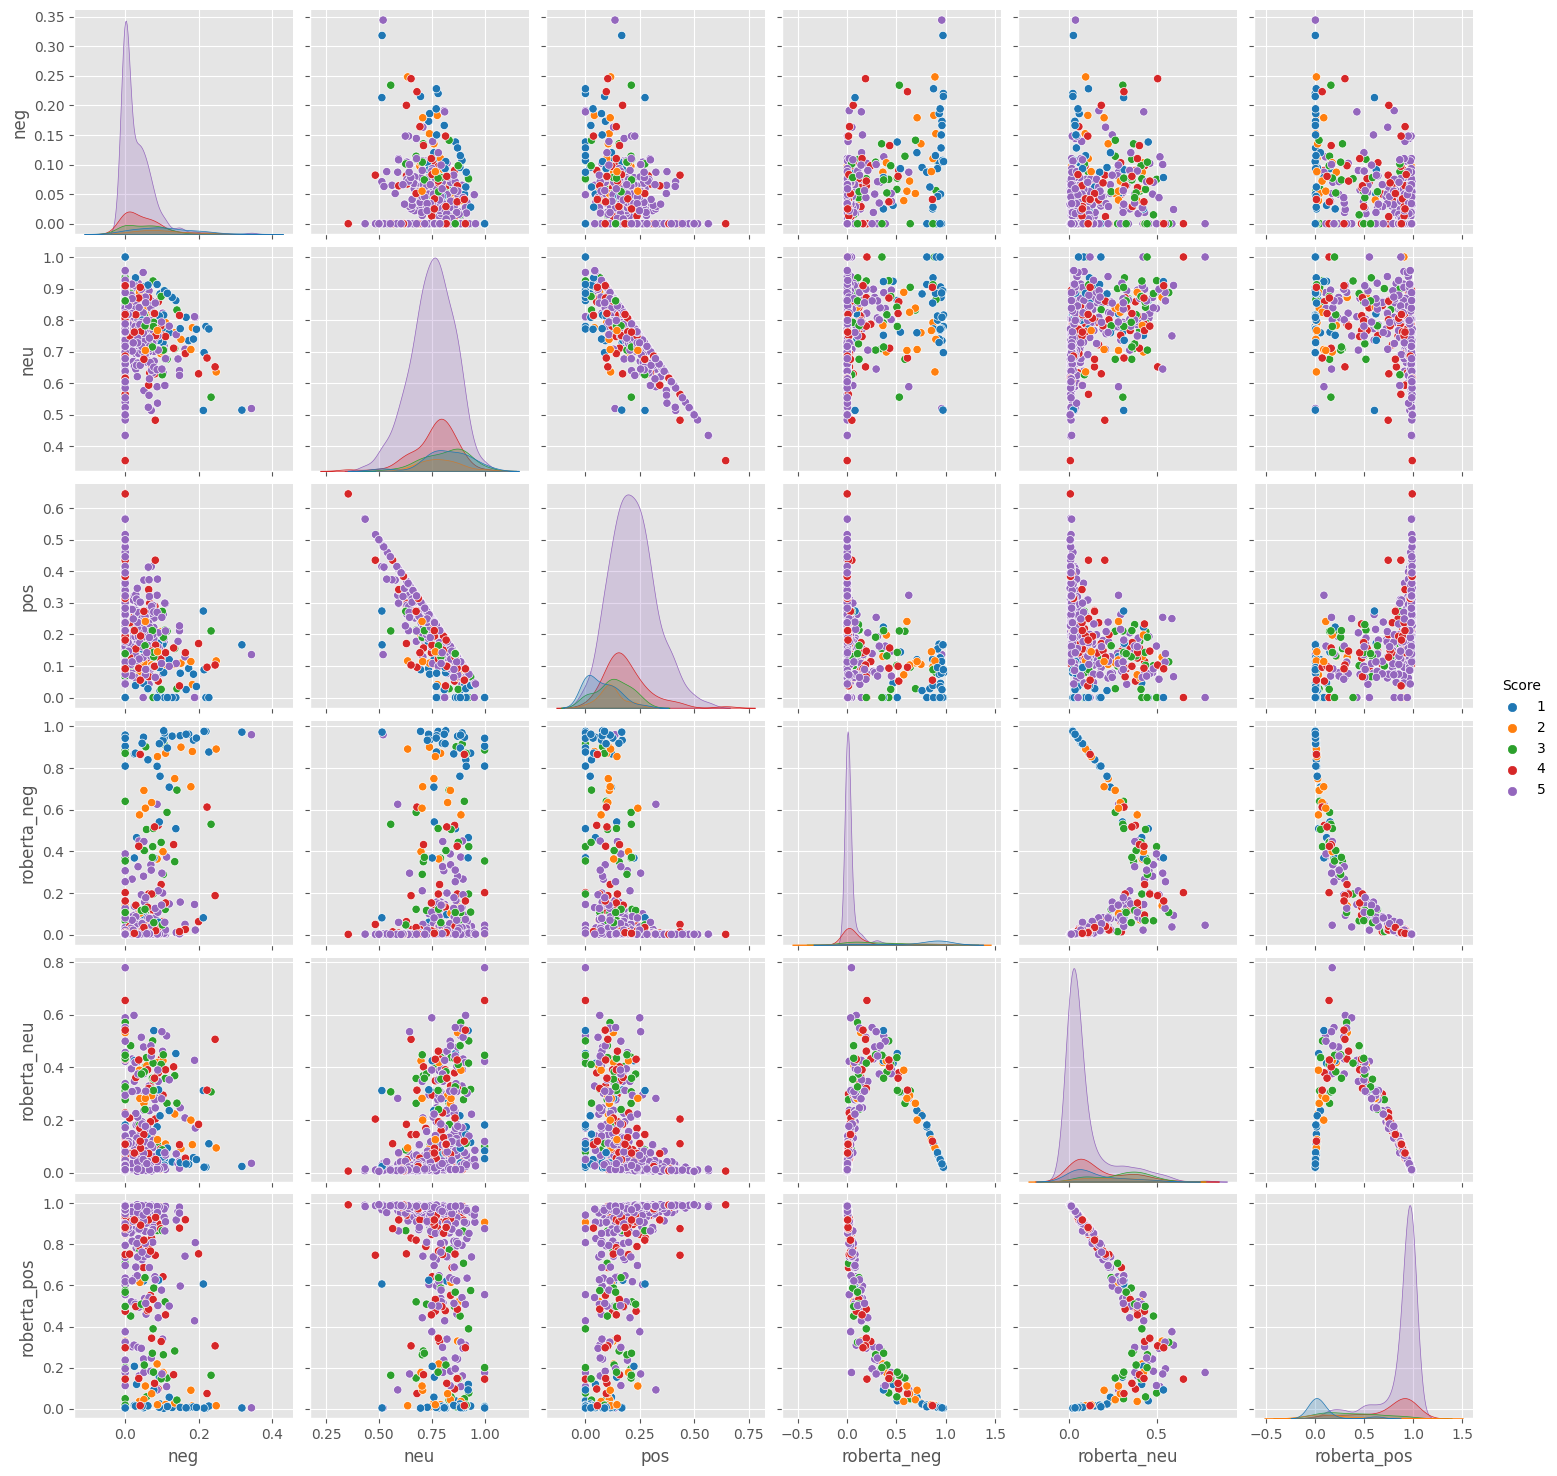

In [151]:
sns.pairplot(data=results_df,
             vars=['neg', 'neu', 'pos', 'roberta_neg', 'roberta_neu','roberta_pos'],
             hue='Score',
             palette='tab10')
plt.show()

In [152]:
results_df.query('Score==1')\
    .sort_values('roberta_pos',ascending=False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [153]:
results_df.query('Score==1')\
    .sort_values('pos',ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [154]:
results_df.query('Score==5')\
    .sort_values('roberta_neg',ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [155]:
results_df.query('Score==5')\
    .sort_values('neg',ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

# The Transformers Pipeline

In [156]:
from transformers import pipeline

In [164]:
!pip install xformers
sent_pipeline=pipeline('sentiment-analysis')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 MB 7.3 MB/s eta 0:00:00


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [169]:
sent_pipeline('i love every hater')

[{'label': 'POSITIVE', 'score': 0.9980180263519287}]

# END